In [56]:
import numpy as np
import os
import csv
import cv2
import matplotlib.pyplot as plt
from deepgaze.color_detection import RangeColorDetector
from deepgaze.mask_analysis import BinaryMaskAnalyser

In [57]:
# 設置影像序列路徑和影像數量
image_name = "mizu/20240329_1300/"
image_path = "video/" + image_name
num_frames = len(os.listdir(image_path))

In [58]:
# 定義膚色範圍
min_range = np.array([0, 58, 50], dtype="uint8")  # 膚色的下界
max_range = np.array([30, 255, 255], dtype="uint8")  # 膚色的上界

# 創建色彩檢測器和遮罩分析器對象
my_skin_detector = RangeColorDetector(min_range, max_range)
my_mask_analyser = BinaryMaskAnalyser()

# 設置前一影像的膚色像素數量為初始值
previous_skin_pixels = 0

# 初始化膚色變化列表
skin_pixels_changes = []

# 處理影像序列
for i in range(num_frames):
    # 讀取圖像
    image = cv2.imread(image_path + "frame_{:05d}.jpg".format(i))

    # 過濾膚色範圍並生成二值化遮罩
    image_mask = my_skin_detector.returnMask(image, morph_opening=True, blur=True, kernel_size=3, iterations=1)

    # 統計膚色像素數量
    skin_pixels = np.count_nonzero(image_mask)

    # 計算膚色像素數量的變化
    skin_pixels_change = skin_pixels - previous_skin_pixels

    # 更新前一影像的膚色像素數量
    previous_skin_pixels = skin_pixels

    # 將膚色變化值添加到列表中
    skin_pixels_changes.append(skin_pixels_change)

    # 顯示處理過程，你可以根據需要調整
    # cv2.imshow("image", image)
    # cv2.imshow("mask", image_mask)
    cv2.waitKey(0)

# 關閉窗口
cv2.destroyAllWindows()

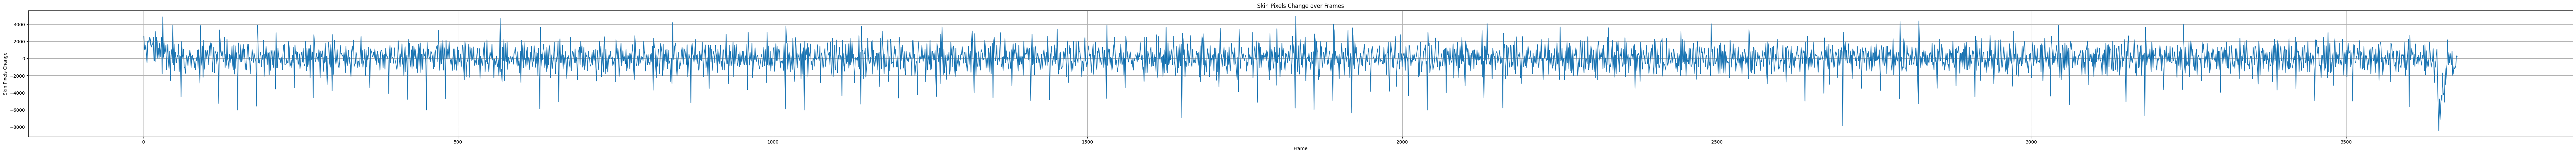

In [59]:
# 指定保存CSV文件的資料夾路徑
output_folder = "HSV_output/" + os.path.split(image_name[:-1])[0] 
output_file_name = image_name.replace("/", "_")[0:-1].split("_")[-2]
os.makedirs(output_folder, exist_ok=True) 

# CSV文件的完整路徑
output_file_name = "Skin_Pixels_Change" + "_" + output_file_name
output_file = os.path.join(output_folder, f"{output_file_name}.csv")

# 將膚色變化值保存到CSV文件
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Frame', 'Skin Pixels Change'])
    for i, change in enumerate(skin_pixels_changes):
        writer.writerow([i, change])

# 繪製膚色變化曲線
plt.figure(figsize=(100, 5))
plt.plot(range(1,num_frames), skin_pixels_changes[1:])
plt.xlabel('Frame')
plt.ylabel('Skin Pixels Change')
plt.title('Skin Pixels Change over Frames')
plt.grid(True)
plt.savefig(f'{output_folder}/{output_file_name}.png')  
plt.show()